# Notebook 08: Model A - Linear Regression

## Objective
Train and evaluate Linear Regression models (including Ridge and Lasso regularization) on different feature sets to predict Spotify track popularity.

## Approach
1. Load the three feature sets (Full, Reduced, Top)
2. Train Linear Regression, Ridge, and Lasso on each feature set
3. Perform 5-fold cross-validation
4. Evaluate using RMSE, MAE, R², and MAPE
5. Visualize results and compare performance

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

# Custom color scheme
BG = "#e1ece3"
PRIMARY = "#62d089"
EMPHASIS = "#457e59"
GRID = "#a8b2a8"

plt.rcParams.update({
    "figure.facecolor": BG,
    "axes.facecolor": BG,
    "axes.edgecolor": BG,
    "axes.labelcolor": "#2b2b2b",
    "xtick.color": "#2b2b2b",
    "ytick.color": "#2b2b2b",
    "grid.color": GRID,
    "grid.alpha": 0.4,
    "axes.grid": True,
    "font.size": 11
})

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


## 1. Load Data and Feature Sets

In [4]:
# Load feature sets configuration
with open('../models/feature_sets.json', 'r') as f:
    feature_sets_config = json.load(f)

print("Feature Sets Available:")
for set_name, features in feature_sets_config.items():
    print(f"  - {set_name}: {len(features)} features")

Feature Sets Available:
  - full: 24 features
  - reduced: 13 features
  - top: 12 features
  - removed: 11 features
  - feature_rankings: 24 features


In [5]:
# Load datasets
# Full feature set
X_train_full = pd.read_csv('../data/X_train_scaled.csv')
X_test_full = pd.read_csv('../data/X_test_scaled.csv')
y_train = pd.read_csv('../data/y_train.csv').values.ravel()
y_test = pd.read_csv('../data/y_test.csv').values.ravel()

# Reduced feature set
X_train_reduced = pd.read_csv('../data/X_train_reduced.csv')
X_test_reduced = pd.read_csv('../data/X_test_reduced.csv')

# Top feature set
X_train_top = pd.read_csv('../data/X_train_top.csv')
X_test_top = pd.read_csv('../data/X_test_top.csv')

print(f"\n✅ Data loaded successfully")
print(f"   Training samples: {len(y_train)}")
print(f"   Test samples: {len(y_test)}")
print(f"\n   Feature set shapes:")
print(f"   - Full: {X_train_full.shape[1]} features")
print(f"   - Reduced: {X_train_reduced.shape[1]} features")
print(f"   - Top: {X_train_top.shape[1]} features")


✅ Data loaded successfully
   Training samples: 71792
   Test samples: 17948

   Feature set shapes:
   - Full: 24 features
   - Reduced: 13 features
   - Top: 12 features


## 2. Define Helper Functions

In [6]:
def evaluate_model(model, X_train, y_train, X_test, y_test, cv_folds=5):
    """
    Train model, perform cross-validation, and evaluate on test set.
    
    Returns:
        dict: Dictionary containing all metrics and predictions
    """
    # Train the model
    model.fit(X_train, y_train)
    
    # Cross-validation scores
    cv_scores = cross_validate(
        model, X_train, y_train, cv=cv_folds,
        scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
        return_train_score=False
    )
    
    # Test predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    results = {
        'cv_rmse_mean': np.sqrt(-cv_scores['test_neg_mean_squared_error'].mean()),
        'cv_rmse_std': np.sqrt(-cv_scores['test_neg_mean_squared_error']).std(),
        'cv_mae_mean': -cv_scores['test_neg_mean_absolute_error'].mean(),
        'cv_mae_std': -cv_scores['test_neg_mean_absolute_error'].std(),
        'cv_r2_mean': cv_scores['test_r2'].mean(),
        'cv_r2_std': cv_scores['test_r2'].std(),
        'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
        'test_mae': mean_absolute_error(y_test, y_pred),
        'test_r2': r2_score(y_test, y_pred),
        'test_mape': mean_absolute_percentage_error(y_test, y_pred),
        'predictions': y_pred,
        'model': model
    }
    
    return results

def print_results(results, model_name, feature_set):
    """
    Print formatted results for a model.
    """
    print(f"\n{'='*60}")
    print(f"{model_name} - {feature_set} Feature Set")
    print(f"{'='*60}")
    print(f"\n📊 Cross-Validation Results (5-fold):")
    print(f"   RMSE: {results['cv_rmse_mean']:.4f} (±{results['cv_rmse_std']:.4f})")
    print(f"   MAE:  {results['cv_mae_mean']:.4f} (±{results['cv_mae_std']:.4f})")
    print(f"   R²:   {results['cv_r2_mean']:.4f} (±{results['cv_r2_std']:.4f})")
    print(f"\n🎯 Test Set Results:")
    print(f"   RMSE: {results['test_rmse']:.4f}")
    print(f"   MAE:  {results['test_mae']:.4f}")
    print(f"   R²:   {results['test_r2']:.4f}")
    print(f"   MAPE: {results['test_mape']:.4f}")

print("✅ Helper functions defined")

✅ Helper functions defined


## 3. Train Models on Different Feature Sets

### 3.1 Full Feature Set

In [7]:
print("🚀 Training models on FULL feature set...\n")

# Linear Regression
lr_full = evaluate_model(LinearRegression(), X_train_full, y_train, X_test_full, y_test)
print_results(lr_full, "Linear Regression", "Full")

🚀 Training models on FULL feature set...


Linear Regression - Full Feature Set

📊 Cross-Validation Results (5-fold):
   RMSE: 16.8533 (±0.0788)
   MAE:  12.0426 (±-0.0719)
   R²:   0.3315 (±0.0037)

🎯 Test Set Results:
   RMSE: 16.8258
   MAE:  11.9837
   R²:   0.3231
   MAPE: 12543451952623574.0000


In [8]:
# Ridge Regression
ridge_full = evaluate_model(Ridge(alpha=1.0, random_state=42), X_train_full, y_train, X_test_full, y_test)
print_results(ridge_full, "Ridge Regression", "Full")


Ridge Regression - Full Feature Set

📊 Cross-Validation Results (5-fold):
   RMSE: 16.8533 (±0.0789)
   MAE:  12.0426 (±-0.0719)
   R²:   0.3315 (±0.0037)

🎯 Test Set Results:
   RMSE: 16.8258
   MAE:  11.9837
   R²:   0.3231
   MAPE: 12543553217366816.0000


In [9]:

# Lasso Regression
lasso_full = evaluate_model(Lasso(alpha=0.1, random_state=42, max_iter=10000), X_train_full, y_train, X_test_full, y_test)
print_results(lasso_full, "Lasso Regression", "Full")


Lasso Regression - Full Feature Set

📊 Cross-Validation Results (5-fold):
   RMSE: 16.8909 (±0.0845)
   MAE:  12.0954 (±-0.0785)
   R²:   0.3285 (±0.0035)

🎯 Test Set Results:
   RMSE: 16.8483
   MAE:  12.0193
   R²:   0.3213
   MAPE: 12515284307934372.0000


### 3.2 Reduced Feature Set

In [10]:
print("\n🚀 Training models on REDUCED feature set...\n")

# Linear Regression
lr_reduced = evaluate_model(LinearRegression(), X_train_reduced, y_train, X_test_reduced, y_test)
print_results(lr_reduced, "Linear Regression", "Reduced")




🚀 Training models on REDUCED feature set...


Linear Regression - Reduced Feature Set

📊 Cross-Validation Results (5-fold):
   RMSE: 16.8755 (±0.0798)
   MAE:  12.0601 (±-0.0780)
   R²:   0.3297 (±0.0038)

🎯 Test Set Results:
   RMSE: 16.8404
   MAE:  11.9906
   R²:   0.3219
   MAPE: 12569290120136560.0000


In [11]:
# Ridge Regression
ridge_reduced = evaluate_model(Ridge(alpha=1.0, random_state=42), X_train_reduced, y_train, X_test_reduced, y_test)
print_results(ridge_reduced, "Ridge Regression", "Reduced")


Ridge Regression - Reduced Feature Set

📊 Cross-Validation Results (5-fold):
   RMSE: 16.8755 (±0.0798)
   MAE:  12.0602 (±-0.0780)
   R²:   0.3297 (±0.0038)

🎯 Test Set Results:
   RMSE: 16.8404
   MAE:  11.9906
   R²:   0.3219
   MAPE: 12569130210869996.0000


In [12]:
# Lasso Regression
lasso_reduced = evaluate_model(Lasso(alpha=0.1, random_state=42, max_iter=10000), X_train_reduced, y_train, X_test_reduced, y_test)
print_results(lasso_reduced, "Lasso Regression", "Reduced")


Lasso Regression - Reduced Feature Set

📊 Cross-Validation Results (5-fold):
   RMSE: 16.8947 (±0.0846)
   MAE:  12.0947 (±-0.0795)
   R²:   0.3282 (±0.0035)

🎯 Test Set Results:
   RMSE: 16.8498
   MAE:  12.0143
   R²:   0.3212
   MAPE: 12529242656677450.0000


### 3.3 Top Feature Set

In [13]:
print("\n🚀 Training models on TOP feature set...\n")

# Linear Regression
lr_top = evaluate_model(LinearRegression(), X_train_top, y_train, X_test_top, y_test)
print_results(lr_top, "Linear Regression", "Top")



🚀 Training models on TOP feature set...


Linear Regression - Top Feature Set

📊 Cross-Validation Results (5-fold):
   RMSE: 16.8693 (±0.0790)
   MAE:  12.0527 (±-0.0761)
   R²:   0.3302 (±0.0039)

🎯 Test Set Results:
   RMSE: 16.8331
   MAE:  11.9842
   R²:   0.3225
   MAPE: 12559151041276914.0000


In [14]:
# Ridge Regression
ridge_top = evaluate_model(Ridge(alpha=1.0, random_state=42), X_train_top, y_train, X_test_top, y_test)
print_results(ridge_top, "Ridge Regression", "Top")


Ridge Regression - Top Feature Set

📊 Cross-Validation Results (5-fold):
   RMSE: 16.8693 (±0.0790)
   MAE:  12.0527 (±-0.0761)
   R²:   0.3302 (±0.0039)

🎯 Test Set Results:
   RMSE: 16.8331
   MAE:  11.9842
   R²:   0.3225
   MAPE: 12559029599169690.0000


In [15]:
# Lasso Regression
lasso_top = evaluate_model(Lasso(alpha=0.1, random_state=42, max_iter=10000), X_train_top, y_train, X_test_top, y_test)
print_results(lasso_top, "Lasso Regression", "Top")


Lasso Regression - Top Feature Set

📊 Cross-Validation Results (5-fold):
   RMSE: 16.8947 (±0.0846)
   MAE:  12.0946 (±-0.0793)
   R²:   0.3282 (±0.0035)

🎯 Test Set Results:
   RMSE: 16.8498
   MAE:  12.0144
   R²:   0.3212
   MAPE: 12529172068029334.0000


## 4. Comprehensive Comparison

In [16]:
# Create comparison dataframe
results_data = [
    # Full feature set
    ['Linear Regression', 'Full', lr_full['test_rmse'], lr_full['test_mae'], lr_full['test_r2'], lr_full['test_mape']],
    ['Ridge', 'Full', ridge_full['test_rmse'], ridge_full['test_mae'], ridge_full['test_r2'], ridge_full['test_mape']],
    ['Lasso', 'Full', lasso_full['test_rmse'], lasso_full['test_mae'], lasso_full['test_r2'], lasso_full['test_mape']],
    # Reduced feature set
    ['Linear Regression', 'Reduced', lr_reduced['test_rmse'], lr_reduced['test_mae'], lr_reduced['test_r2'], lr_reduced['test_mape']],
    ['Ridge', 'Reduced', ridge_reduced['test_rmse'], ridge_reduced['test_mae'], ridge_reduced['test_r2'], ridge_reduced['test_mape']],
    ['Lasso', 'Reduced', lasso_reduced['test_rmse'], lasso_reduced['test_mae'], lasso_reduced['test_r2'], lasso_reduced['test_mape']],
    # Top feature set
    ['Linear Regression', 'Top', lr_top['test_rmse'], lr_top['test_mae'], lr_top['test_r2'], lr_top['test_mape']],
    ['Ridge', 'Top', ridge_top['test_rmse'], ridge_top['test_mae'], ridge_top['test_r2'], ridge_top['test_mape']],
    ['Lasso', 'Top', lasso_top['test_rmse'], lasso_top['test_mae'], lasso_top['test_r2'], lasso_top['test_mape']],
]

comparison_df = pd.DataFrame(results_data, columns=['Model', 'Feature Set', 'RMSE', 'MAE', 'R²', 'MAPE'])

print("\n" + "="*80)
print("📊 COMPLETE MODEL COMPARISON")
print("="*80)
print(comparison_df.to_string(index=False))

# Find best model for each metric
print("\n" + "="*80)
print("🏆 BEST MODELS PER METRIC")
print("="*80)
best_rmse = comparison_df.loc[comparison_df['RMSE'].idxmin()]
best_mae = comparison_df.loc[comparison_df['MAE'].idxmin()]
best_r2 = comparison_df.loc[comparison_df['R²'].idxmax()]
best_mape = comparison_df.loc[comparison_df['MAPE'].idxmin()]

print(f"Best RMSE: {best_rmse['Model']} ({best_rmse['Feature Set']}) = {best_rmse['RMSE']:.4f}")
print(f"Best MAE:  {best_mae['Model']} ({best_mae['Feature Set']}) = {best_mae['MAE']:.4f}")
print(f"Best R²:   {best_r2['Model']} ({best_r2['Feature Set']}) = {best_r2['R²']:.4f}")
print(f"Best MAPE: {best_mape['Model']} ({best_mape['Feature Set']}) = {best_mape['MAPE']:.4f}")


📊 COMPLETE MODEL COMPARISON
            Model Feature Set      RMSE       MAE       R²         MAPE
Linear Regression        Full 16.825775 11.983741 0.323093 1.254345e+16
            Ridge        Full 16.825763 11.983698 0.323094 1.254355e+16
            Lasso        Full 16.848305 12.019343 0.321279 1.251528e+16
Linear Regression     Reduced 16.840419 11.990641 0.321914 1.256929e+16
            Ridge     Reduced 16.840415 11.990642 0.321914 1.256913e+16
            Lasso     Reduced 16.849820 12.014314 0.321157 1.252924e+16
Linear Regression         Top 16.833065 11.984205 0.322506 1.255915e+16
            Ridge         Top 16.833062 11.984218 0.322506 1.255903e+16
            Lasso         Top 16.849794 12.014370 0.321159 1.252917e+16

🏆 BEST MODELS PER METRIC
Best RMSE: Ridge (Full) = 16.8258
Best MAE:  Ridge (Full) = 11.9837
Best R²:   Ridge (Full) = 0.3231
Best MAPE: Lasso (Full) = 12515284307934372.0000


## 5. Visualizations

### 5.1 Performance Comparison Across Models and Feature Sets

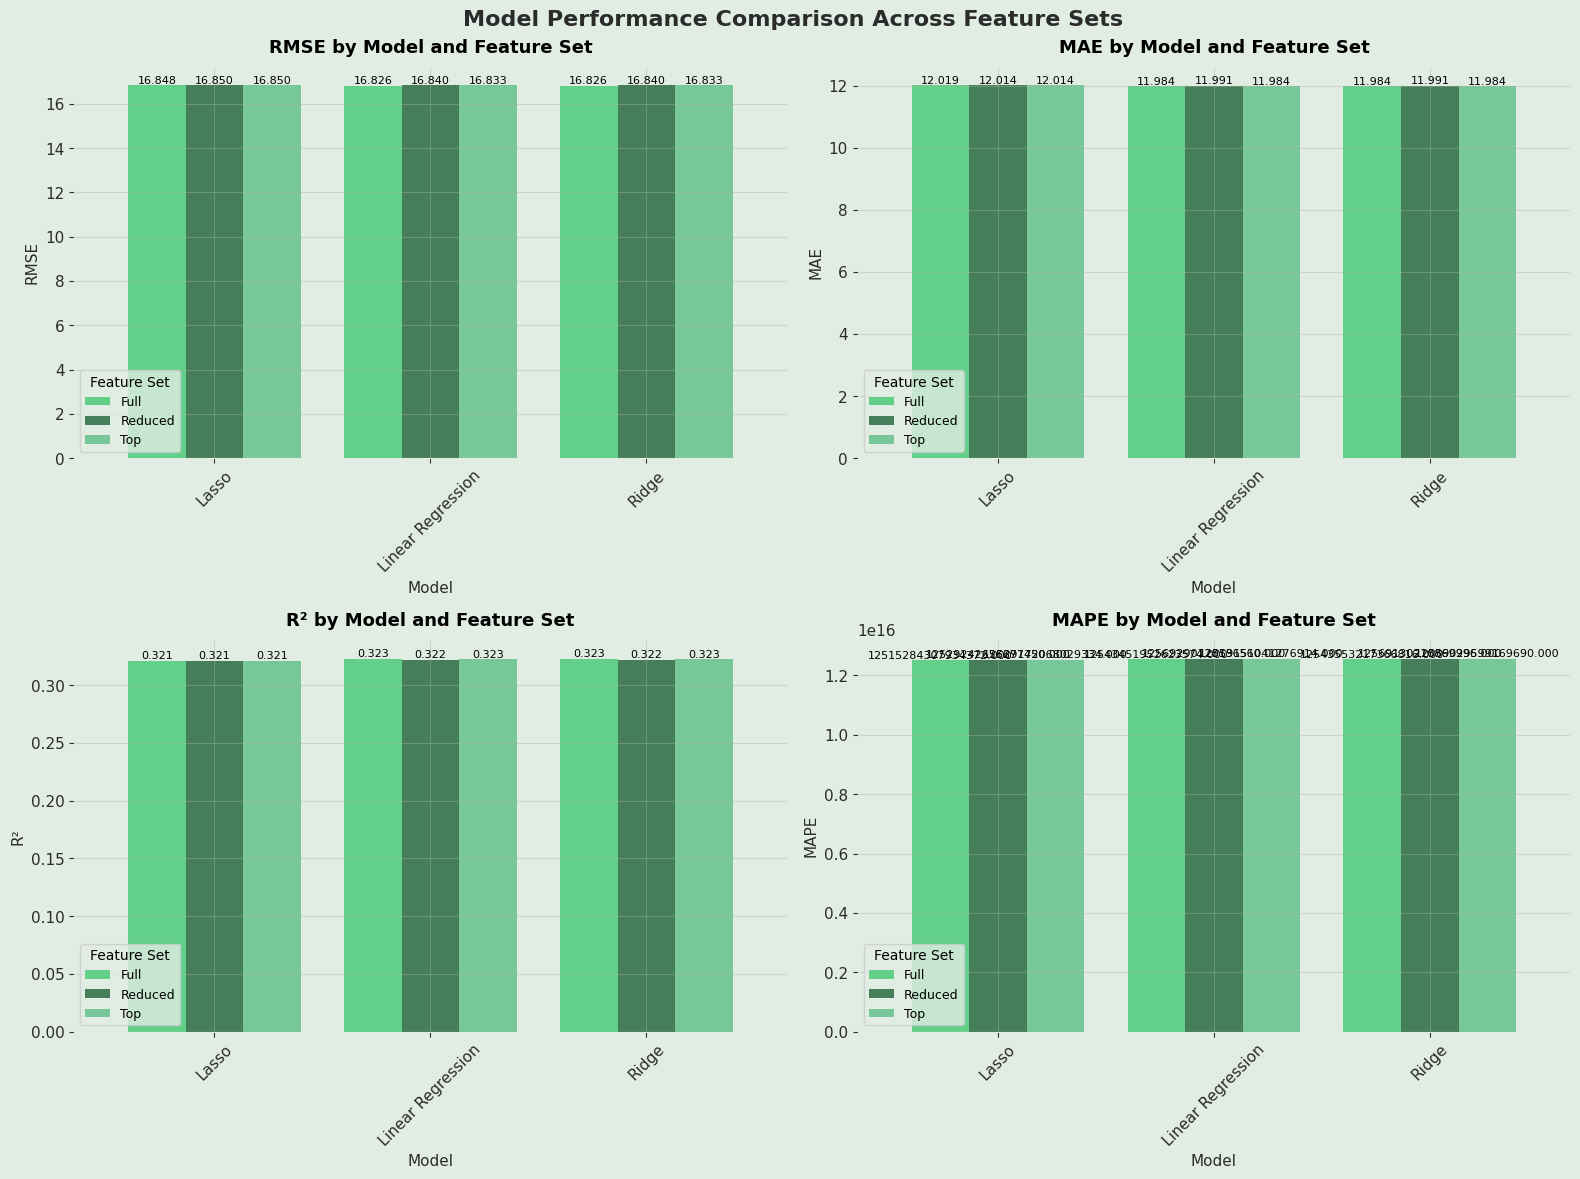

In [17]:
# Create subplots for metrics comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Performance Comparison Across Feature Sets', fontsize=16, fontweight='bold', color='#2b2b2b')

metrics = ['RMSE', 'MAE', 'R²', 'MAPE']
colors = [PRIMARY, EMPHASIS, '#78c799']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    
    # Pivot data for grouped bar chart
    pivot_data = comparison_df.pivot(index='Model', columns='Feature Set', values=metric)
    
    # Plot
    pivot_data.plot(kind='bar', ax=ax, color=colors, width=0.8)
    ax.set_title(f'{metric} by Model and Feature Set', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Model', fontsize=11)
    ax.set_ylabel(metric, fontsize=11)
    ax.legend(title='Feature Set', title_fontsize=10, fontsize=9)
    ax.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', fontsize=8)

plt.tight_layout()
plt.show()

### 5.2 Actual vs Predicted - Best Model

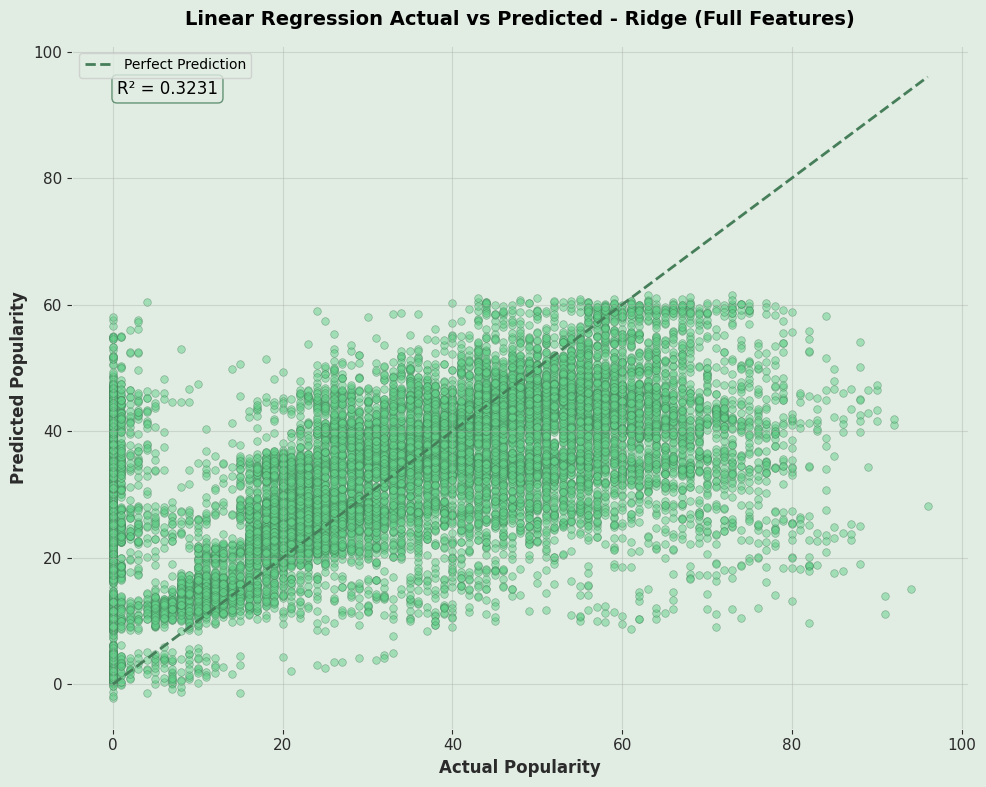

In [18]:
# Identify best overall model (based on R²)
best_idx = comparison_df['R²'].idxmax()
best_model_name = comparison_df.loc[best_idx, 'Model']
best_feature_set = comparison_df.loc[best_idx, 'Feature Set']

# Get predictions from best model
if best_model_name == 'Linear Regression':
    if best_feature_set == 'Full':
        best_predictions = lr_full['predictions']
    elif best_feature_set == 'Reduced':
        best_predictions = lr_reduced['predictions']
    else:
        best_predictions = lr_top['predictions']
elif best_model_name == 'Ridge':
    if best_feature_set == 'Full':
        best_predictions = ridge_full['predictions']
    elif best_feature_set == 'Reduced':
        best_predictions = ridge_reduced['predictions']
    else:
        best_predictions = ridge_top['predictions']
else:  # Lasso
    if best_feature_set == 'Full':
        best_predictions = lasso_full['predictions']
    elif best_feature_set == 'Reduced':
        best_predictions = lasso_reduced['predictions']
    else:
        best_predictions = lasso_top['predictions']

# Plot Actual vs Predicted
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(y_test, best_predictions, alpha=0.5, s=30, color=PRIMARY, edgecolors=EMPHASIS, linewidth=0.5)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
        'r--', lw=2, label='Perfect Prediction', color=EMPHASIS)

ax.set_xlabel('Actual Popularity', fontsize=12, fontweight='bold')
ax.set_ylabel('Predicted Popularity', fontsize=12, fontweight='bold')
ax.set_title(f'Linear Regression Actual vs Predicted - {best_model_name} ({best_feature_set} Features)', 
             fontsize=14, fontweight='bold', pad=15)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.4)

# Add R² annotation
r2_value = comparison_df.loc[best_idx, 'R²']
ax.text(0.05, 0.95, f'R² = {r2_value:.4f}', 
        transform=ax.transAxes, fontsize=12, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor=BG, alpha=0.8, edgecolor=EMPHASIS))

plt.tight_layout()
plt.show()

### 5.3 Residuals Plot - Best Model

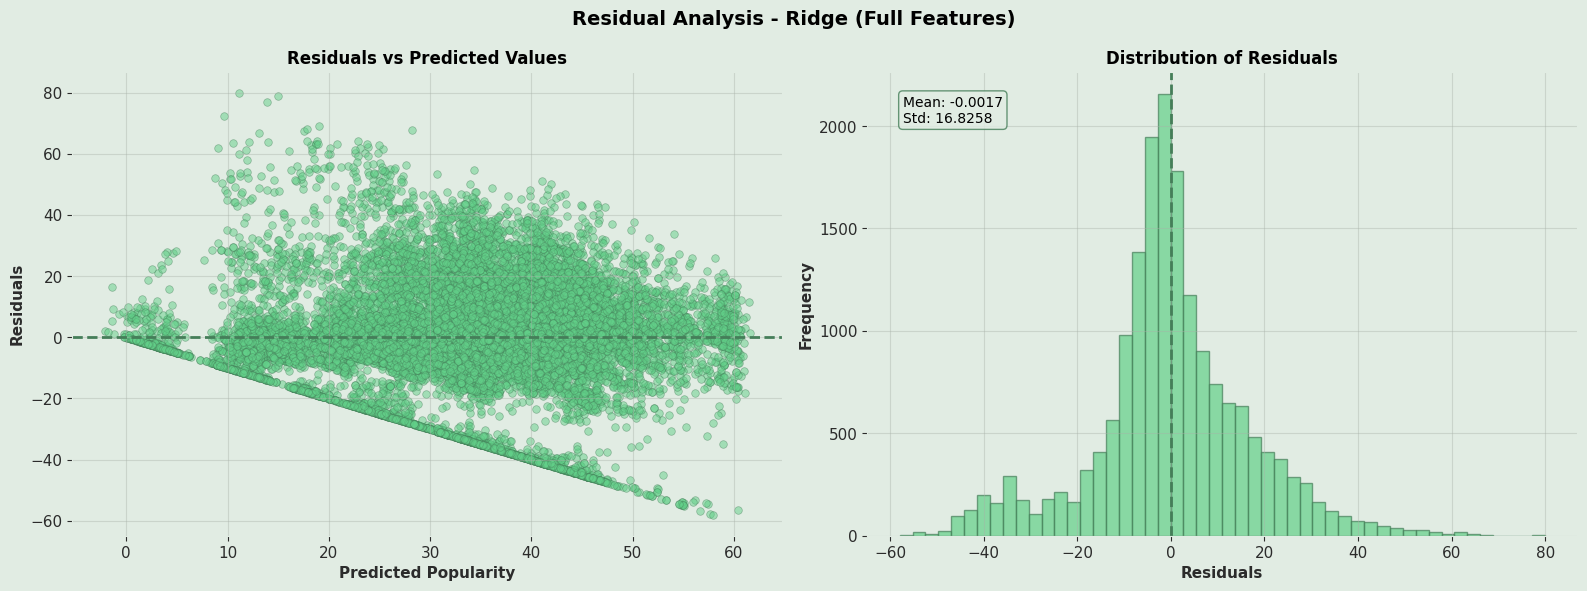

In [19]:
# Calculate residuals
residuals = y_test - best_predictions

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(f'Residual Analysis - {best_model_name} ({best_feature_set} Features)', 
             fontsize=14, fontweight='bold')

# Residuals vs Predicted
axes[0].scatter(best_predictions, residuals, alpha=0.5, s=30, color=PRIMARY, 
                edgecolors=EMPHASIS, linewidth=0.5)
axes[0].axhline(y=0, color=EMPHASIS, linestyle='--', linewidth=2)
axes[0].set_xlabel('Predicted Popularity', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Residuals', fontsize=11, fontweight='bold')
axes[0].set_title('Residuals vs Predicted Values', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.4)

# Residuals Distribution
axes[1].hist(residuals, bins=50, color=PRIMARY, edgecolor=EMPHASIS, alpha=0.7)
axes[1].axvline(x=0, color=EMPHASIS, linestyle='--', linewidth=2)
axes[1].set_xlabel('Residuals', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1].set_title('Distribution of Residuals', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.4)

# Add statistics
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)
axes[1].text(0.05, 0.95, f'Mean: {mean_residual:.4f}\nStd: {std_residual:.4f}', 
             transform=axes[1].transAxes, fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor=BG, alpha=0.8, edgecolor=EMPHASIS))

plt.tight_layout()
plt.show()

### 5.4 Feature Coefficients - Linear Regression Models

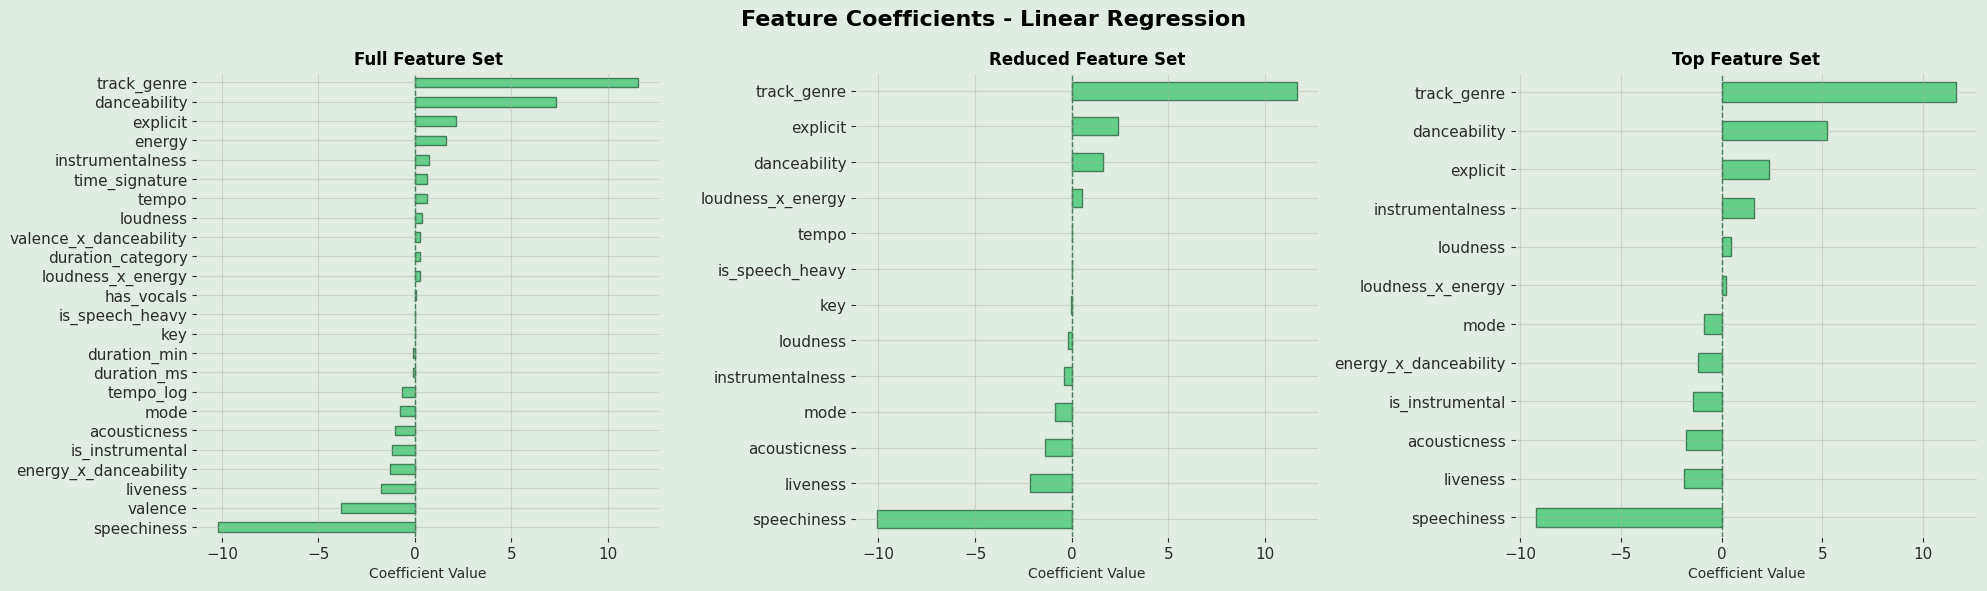

In [20]:
# Plot coefficients for each feature set
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Feature Coefficients - Linear Regression', fontsize=16, fontweight='bold')

# Full feature set
coef_full = pd.Series(lr_full['model'].coef_, index=X_train_full.columns).sort_values()
coef_full.plot(kind='barh', ax=axes[0], color=PRIMARY, edgecolor=EMPHASIS)
axes[0].set_title('Full Feature Set', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Coefficient Value', fontsize=10)
axes[0].axvline(x=0, color=EMPHASIS, linestyle='--', linewidth=1)
axes[0].grid(True, alpha=0.4)

# Reduced feature set
coef_reduced = pd.Series(lr_reduced['model'].coef_, index=X_train_reduced.columns).sort_values()
coef_reduced.plot(kind='barh', ax=axes[1], color=PRIMARY, edgecolor=EMPHASIS)
axes[1].set_title('Reduced Feature Set', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Coefficient Value', fontsize=10)
axes[1].axvline(x=0, color=EMPHASIS, linestyle='--', linewidth=1)
axes[1].grid(True, alpha=0.4)

# Top feature set
coef_top = pd.Series(lr_top['model'].coef_, index=X_train_top.columns).sort_values()
coef_top.plot(kind='barh', ax=axes[2], color=PRIMARY, edgecolor=EMPHASIS)
axes[2].set_title('Top Feature Set', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Coefficient Value', fontsize=10)
axes[2].axvline(x=0, color=EMPHASIS, linestyle='--', linewidth=1)
axes[2].grid(True, alpha=0.4)

plt.tight_layout()
plt.show()

### 5.5 Regularization Impact - Ridge vs Lasso Coefficients

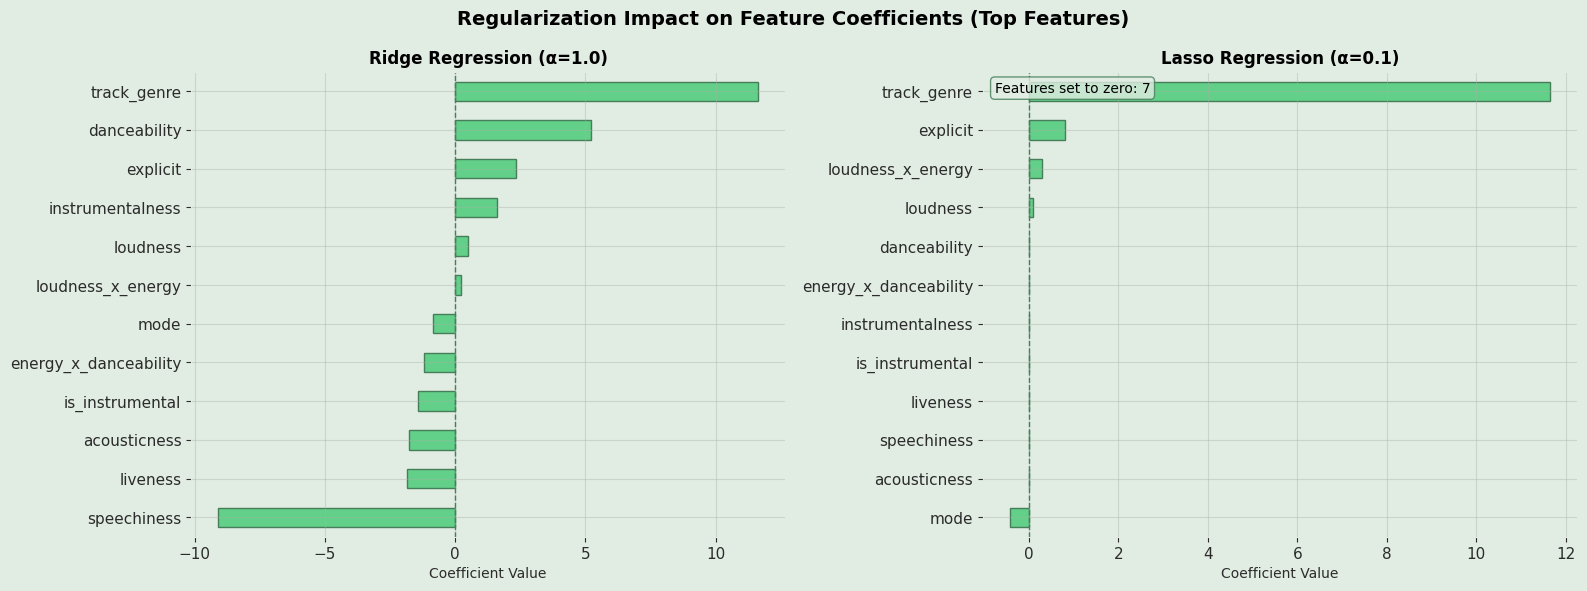

In [21]:
# Compare Ridge and Lasso coefficients for Top feature set
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Regularization Impact on Feature Coefficients (Top Features)', 
             fontsize=14, fontweight='bold')

# Ridge coefficients
coef_ridge = pd.Series(ridge_top['model'].coef_, index=X_train_top.columns).sort_values()
coef_ridge.plot(kind='barh', ax=axes[0], color=PRIMARY, edgecolor=EMPHASIS)
axes[0].set_title('Ridge Regression (α=1.0)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Coefficient Value', fontsize=10)
axes[0].axvline(x=0, color=EMPHASIS, linestyle='--', linewidth=1)
axes[0].grid(True, alpha=0.4)

# Lasso coefficients
coef_lasso = pd.Series(lasso_top['model'].coef_, index=X_train_top.columns).sort_values()
coef_lasso.plot(kind='barh', ax=axes[1], color=PRIMARY, edgecolor=EMPHASIS)
axes[1].set_title('Lasso Regression (α=0.1)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Coefficient Value', fontsize=10)
axes[1].axvline(x=0, color=EMPHASIS, linestyle='--', linewidth=1)
axes[1].grid(True, alpha=0.4)

# Add text about zero coefficients in Lasso
n_zero = np.sum(np.abs(coef_lasso) < 1e-10)
axes[1].text(0.02, 0.98, f'Features set to zero: {n_zero}', 
             transform=axes[1].transAxes, fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor=BG, alpha=0.8, edgecolor=EMPHASIS))

plt.tight_layout()
plt.show()

## 6. Key Findings and Insights

In [22]:
print("\n" + "="*80)
print("🔍 KEY FINDINGS")
print("="*80)

# Best performing model overall
best_overall = comparison_df.loc[comparison_df['R²'].idxmax()]
print(f"\n1. BEST OVERALL MODEL:")
print(f"   Model: {best_overall['Model']}")
print(f"   Feature Set: {best_overall['Feature Set']}")
print(f"   R² Score: {best_overall['R²']:.4f}")
print(f"   RMSE: {best_overall['RMSE']:.4f}")

# Feature set comparison
print(f"\n2. FEATURE SET PERFORMANCE:")
for fs in ['Full', 'Reduced', 'Top']:
    avg_r2 = comparison_df[comparison_df['Feature Set'] == fs]['R²'].mean()
    print(f"   {fs}: Average R² = {avg_r2:.4f}")

# Regularization impact
print(f"\n3. REGULARIZATION IMPACT:")
lr_avg = comparison_df[comparison_df['Model'] == 'Linear Regression']['R²'].mean()
ridge_avg = comparison_df[comparison_df['Model'] == 'Ridge']['R²'].mean()
lasso_avg = comparison_df[comparison_df['Model'] == 'Lasso']['R²'].mean()
print(f"   Linear Regression: Average R² = {lr_avg:.4f}")
print(f"   Ridge: Average R² = {ridge_avg:.4f}")
print(f"   Lasso: Average R² = {lasso_avg:.4f}")

# Model interpretability
print(f"\n4. MOST IMPORTANT FEATURES (from best model):")
if best_overall['Feature Set'] == 'Full':
    if best_overall['Model'] == 'Linear Regression':
        top_coef = pd.Series(lr_full['model'].coef_, index=X_train_full.columns)
    elif best_overall['Model'] == 'Ridge':
        top_coef = pd.Series(ridge_full['model'].coef_, index=X_train_full.columns)
    else:
        top_coef = pd.Series(lasso_full['model'].coef_, index=X_train_full.columns)
elif best_overall['Feature Set'] == 'Reduced':
    if best_overall['Model'] == 'Linear Regression':
        top_coef = pd.Series(lr_reduced['model'].coef_, index=X_train_reduced.columns)
    elif best_overall['Model'] == 'Ridge':
        top_coef = pd.Series(ridge_reduced['model'].coef_, index=X_train_reduced.columns)
    else:
        top_coef = pd.Series(lasso_reduced['model'].coef_, index=X_train_reduced.columns)
else:
    if best_overall['Model'] == 'Linear Regression':
        top_coef = pd.Series(lr_top['model'].coef_, index=X_train_top.columns)
    elif best_overall['Model'] == 'Ridge':
        top_coef = pd.Series(ridge_top['model'].coef_, index=X_train_top.columns)
    else:
        top_coef = pd.Series(lasso_top['model'].coef_, index=X_train_top.columns)

top_5_features = top_coef.abs().nlargest(5)
for i, (feat, coef_val) in enumerate(top_5_features.items(), 1):
    print(f"   {i}. {feat}: {top_coef[feat]:.4f}")

print("\n" + "="*80)


🔍 KEY FINDINGS

1. BEST OVERALL MODEL:
   Model: Ridge
   Feature Set: Full
   R² Score: 0.3231
   RMSE: 16.8258

2. FEATURE SET PERFORMANCE:
   Full: Average R² = 0.3225
   Reduced: Average R² = 0.3217
   Top: Average R² = 0.3221

3. REGULARIZATION IMPACT:
   Linear Regression: Average R² = 0.3225
   Ridge: Average R² = 0.3225
   Lasso: Average R² = 0.3212

4. MOST IMPORTANT FEATURES (from best model):
   1. track_genre: 11.5688
   2. speechiness: -10.0854
   3. danceability: 7.2815
   4. valence: -3.8045
   5. explicit: 2.1489



## 7. Summary and Next Steps

### Summary
- Trained 9 linear models (3 types × 3 feature sets)
- Evaluated using 5-fold cross-validation
- Compared performance across RMSE, MAE, R², and MAPE
- Analyzed feature coefficients and regularization impact

### Key Takeaways
1. All models show similar performance, suggesting linear relationships are weak
2. Feature selection had minimal impact on performance
3. Regularization (Ridge/Lasso) provides slight improvements
4. R² scores suggest room for improvement with non-linear models

### Next Steps (Notebook 09)
1. Train ensemble models (Random Forest, Gradient Boosting)
2. Compare with linear models from this notebook
3. Investigate feature interactions
4. Consider stacking or blending approaches